In [2]:
import poisson_atac as patac
import pandas as pd
import os
from utils import compute_embedding
import scanpy as sc

Global seed set to 0
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/sacred/config/custom_containers.py:273: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if hasattr(np, npf):
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/sacred/config/custom_containers.py:274: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdo

In [12]:
# load results for one batch

In [1]:
batch = "s1d1"

In [3]:
cistopic_out = "/storage/groups/ml01/workspace/laura.martens/atac_poisson_data/models/cistopic/"

In [4]:
X_emb = pd.read_csv(os.path.join(cistopic_out, f"{batch}.txt"), sep = " ", header = None, skiprows=1, index_col=0).T.values

In [5]:
X_emb.shape

(5616, 110)

In [6]:
adata = patac.data.load_neurips(gex=False, batch=batch)

In [7]:
adata.obs.batch

TAGTTGTCACCCTCAC-1-s1d1    s1d1
CTATGGCCATAACGGG-1-s1d1    s1d1
CCGCACACAGGTTAAA-1-s1d1    s1d1
TCATTTGGTAATGGAA-1-s1d1    s1d1
ACCACATAGGTGTCCA-1-s1d1    s1d1
                           ... 
AGACCCGGTTATCCTA-1-s1d1    s1d1
GACCTAAGTGCCTCAC-1-s1d1    s1d1
AGCTCATAGCTATATG-1-s1d1    s1d1
TACGTACAGGAAACTG-1-s1d1    s1d1
GGTTTCTGTTTATCTG-1-s1d1    s1d1
Name: batch, Length: 5616, dtype: category
Categories (1, object): ['s1d1']

In [8]:
compute_embedding(adata, X_emb)

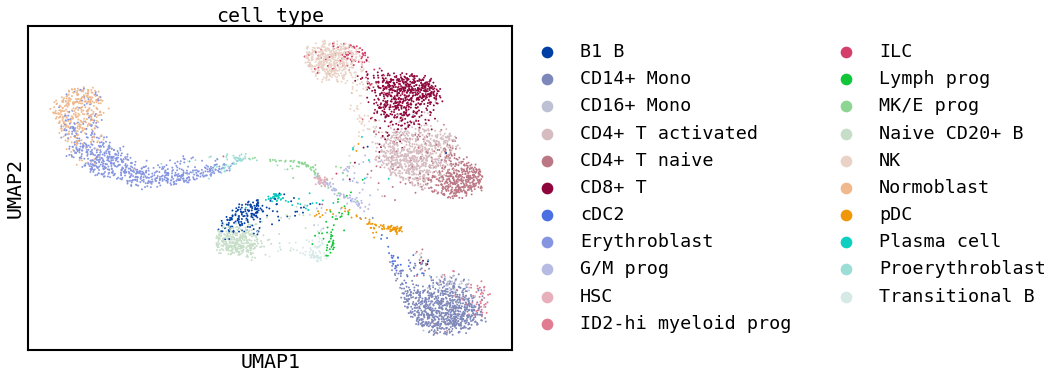

In [9]:
sc.pl.umap(adata, color = "cell_type")

In [10]:
from poisson_atac.seml import evaluation_table, evaluate_embedding

In [11]:
metrics = evaluate_embedding(adata, X_emb, "cell_type")

NMI...
ARI...


In [12]:
metrics

,0
NMI_cluster/label,0.791874
ARI_cluster/label,0.715071
ASW_label,NaN
ASW_label/batch,NaN
PCR_batch,NaN
cell_cycle_conservation,NaN
isolated_label_F1,NaN
isolated_label_silhouette,NaN
graph_conn,NaN
kBET,NaN


In [41]:
pred =  pd.read_csv(os.path.join(cistopic_out, f"{batch}_pred_matrix.txt"), sep = "\t", header = None, skiprows=1, index_col=0).values.T

In [43]:
pred.shape

(4394, 116481)

In [15]:
import scvi

In [16]:
scvi.settings.seed

0

In [ ]:
evaluation_table(y_true=adata.X.A[:100], predictions={"cistopic": pred[:100]})

In [1]:
from utils import get_test_indices

Global seed set to 0
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/icb/laura.martens/miniconda3/envs/poisson_atac_new/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
indices = get_test_indices("atac_atac_prediction_counts",
"7198228b8283fc7348f759ce3d0226a4")

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

get_experiment


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
indices

562

In [ ]:
n_train, n_val = validate_data_split(
            self.adata_manager.adata.n_obs, self.train_size, self.validation_size
        )

    def setup(self, stage: Optional[str] = None):
        """Split indices in train/test/val sets."""
        n_train = self.n_train
        n_val = self.n_val
        random_state = np.random.RandomState(seed=settings.seed)
        permutation = random_state.permutation(self.adata_manager.adata.n_obs)
        self.val_idx = permutation[:n_val]
        self.train_idx = permutation[n_val : (n_val + n_train)]
        self.test_idx = permutation[(n_val + n_train) :]

In [24]:
from scvi.dataloaders._data_splitting import validate_data_split
import numpy as np
import scvi

n_train, n_val = validate_data_split(
    adata.n_obs, 0.8, 0.1
)

random_state = np.random.RandomState(seed=scvi.settings.seed)
permutation = random_state.permutation(adata.n_obs)
val_idx = permutation[:n_val]
train_idx = permutation[n_val : (n_val + n_train)]
test_idx = permutation[(n_val + n_train) :]

In [29]:
test_idx[:100]

array([3922, 2766,  387, 3547, 1337, 4850, 4547, 4795, 3205, 1608,  830,
       5046, 5298, 3418, 1734, 5601, 5555, 1006,  400, 1253,   21, 1305,
        237, 3107, 3665,  671,  845, 4790, 5119, 1353, 5530, 3451,  869,
       3686,  604, 4930, 4998, 4723, 3868,  902, 2904, 1747, 3310, 2051,
       4047, 3928, 2757, 5593, 4417,  696, 1179, 4720, 5422, 2173, 5107,
       1090,  848, 1769, 3808, 4876, 3745,  605,  174, 2269, 2463,  100,
       1243,  741,  334, 2908, 2881, 3292, 3463, 4690, 2987, 4702, 4423,
       4043, 5401, 4736, 1468, 1838, 3123, 3674,  460, 1562, 1975, 3290,
       4515,  738, 1438,  497, 2750, 3945,  375, 5071, 1209, 5037,  404,
       3778])

In [30]:
indices[:100]

array([3922, 2766,  387, 3547, 1337, 4850, 4547, 4795, 3205, 1608,  830,
       5046, 5298, 3418, 1734, 5601, 5555, 1006,  400, 1253,   21, 1305,
        237, 3107, 3665,  671,  845, 4790, 5119, 1353, 5530, 3451,  869,
       3686,  604, 4930, 4998, 4723, 3868,  902, 2904, 1747, 3310, 2051,
       4047, 3928, 2757, 5593, 4417,  696, 1179, 4720, 5422, 2173, 5107,
       1090,  848, 1769, 3808, 4876, 3745,  605,  174, 2269, 2463,  100,
       1243,  741,  334, 2908, 2881, 3292, 3463, 4690, 2987, 4702, 4423,
       4043, 5401, 4736, 1468, 1838, 3123, 3674,  460, 1562, 1975, 3290,
       4515,  738, 1438,  497, 2750, 3945,  375, 5071, 1209, 5037,  404,
       3778])

In [31]:
test_idx == indices

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,